# 股债历史相关性

在理论上，股票和债券的收益率应该是负相关的，但是当**通胀率高于预期**的时候，股债就可能变为高度的正相关。

是否还有其他的因素导致股债正相关还需要继续研究。

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_excel(u'../data/股债历史价格.xlsx', index_col=0)

In [66]:
df.head()

,881001.WI,CBA00102.CS
2004-01-02,933.7751,98.9760
2004-01-05,952.0375,98.7576
2004-01-06,955.8924,98.4755
2004-01-07,966.0709,98.1372
2004-01-08,981.7166,98.4289


In [67]:
corr = df.pct_change()['881001.WI'].rolling(window=243).corr(df.pct_change()['CBA00102.CS'])

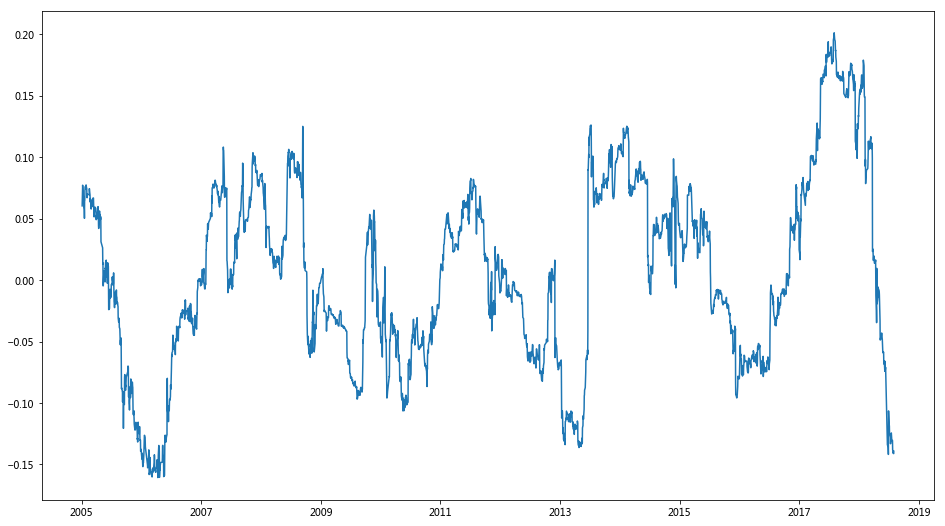

In [68]:
plt.figure(figsize=(16, 9))
plt.plot(corr)

# 计算月度收益率

In [38]:
ret_df = df.pct_change(20) 

In [39]:
ret_df.tail()

,881001.WI,CBA00102.CS
2018-07-25,0.039918,0.007144
2018-07-26,0.042892,0.006734
2018-07-27,0.009821,0.005659
2018-07-30,0.024204,0.005351
2018-07-31,0.018324,0.006214


# 月度采样

In [41]:
month_ret_df = ret_df.resample('M').last()

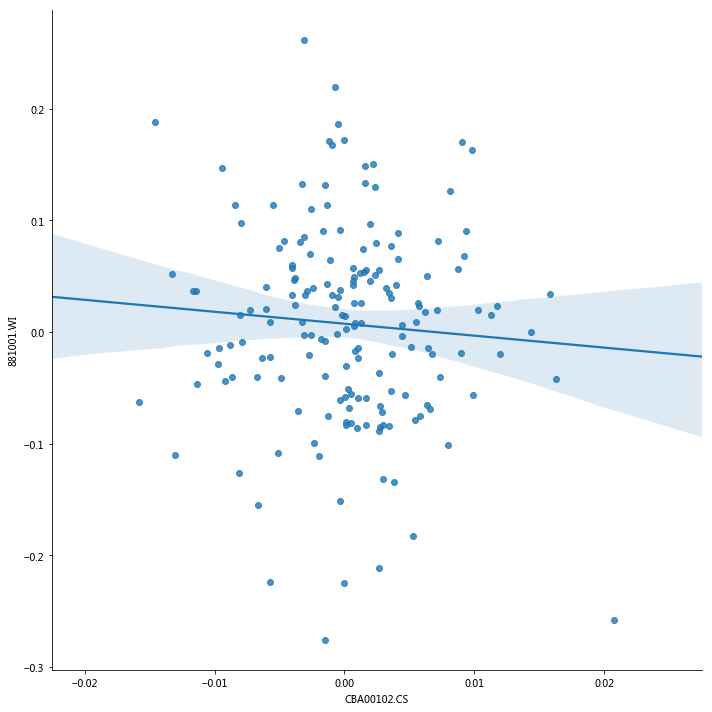

In [59]:
# plt.figure(figsize=(16, 9))
# plt.scatter(month_ret_df['CBA00102.CS'], month_ret_df['881001.WI'])
sns.lmplot(x='CBA00102.CS', y='881001.WI', data=month_ret_df, size=10)

# 分别看当债券收益率大于0和小于0时股债相关性

In [60]:
pos_df, neg_df = month_ret_df[month_ret_df['CBA00102.CS'] > 0], month_ret_df[month_ret_df['CBA00102.CS'] < 0]

### 债券收益率>0时

此时通胀没有超出市场预期，股债应该负相关

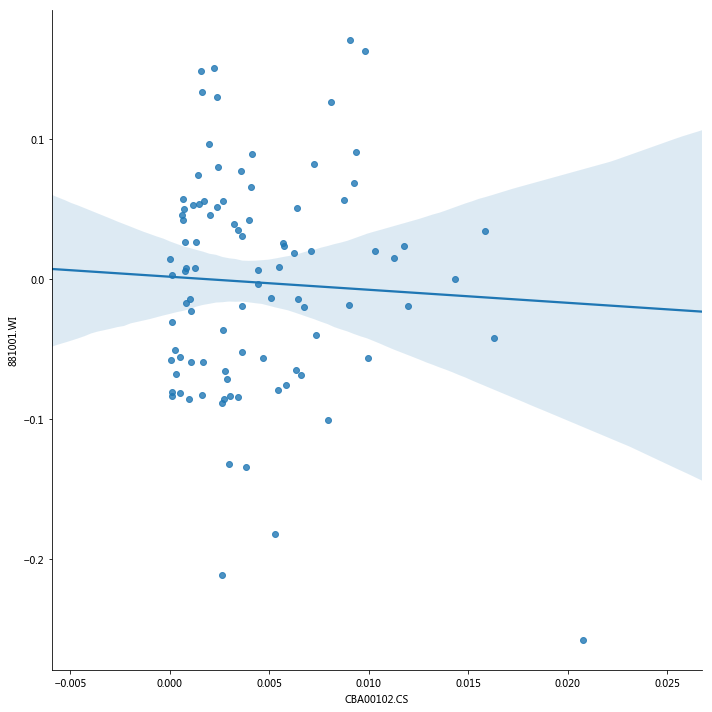

In [61]:
# plt.figure(figsize=(16, 9))
# plt.scatter(pos_df['CBA00102.CS'], pos_df['881001.WI'])
sns.lmplot(x='CBA00102.CS', y='881001.WI', data=pos_df, size=10)

### 债券收益率<0时

当通胀上升超过市场预期，同时损失股票和债券，此时股债正相关

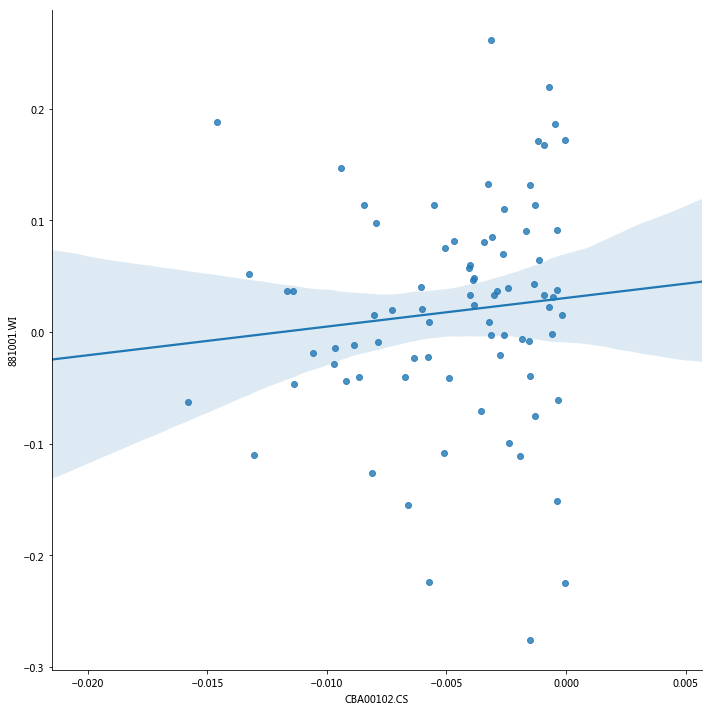

In [62]:
# plt.figure(figsize=(16, 9))
# plt.scatter(neg_df['CBA00102.CS'], neg_df['881001.WI'])
sns.lmplot(x='CBA00102.CS', y='881001.WI', data=neg_df, size=10)

# 股债相关性与10年期国债收益率的关系

股债相关性领先或至少同步于10年期国债收益率

In [69]:
bond = pd.read_excel(u'../data/中债国债到期收益率10年.xlsx', index_col=0)

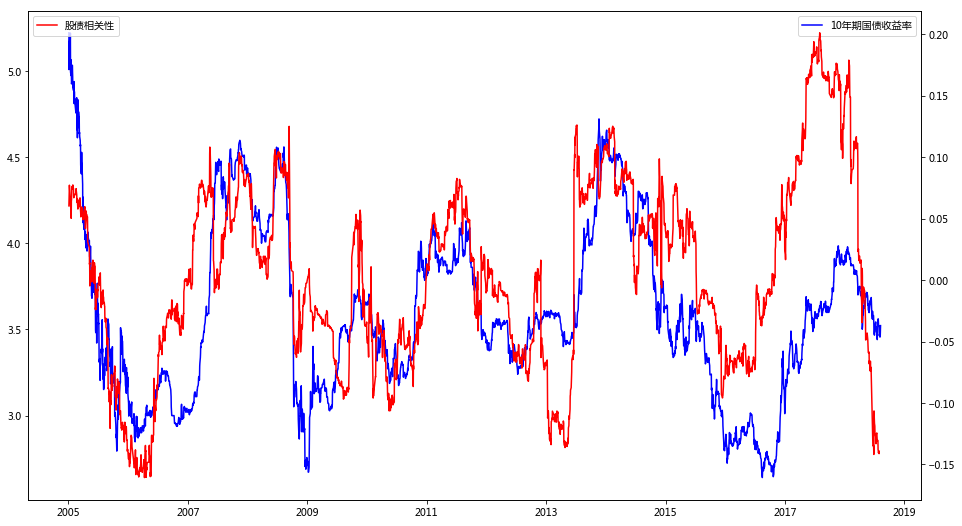

In [78]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(bond, label=u'10年期国债收益率', color='blue')
ax.legend()
ax1 = ax.twinx()
ax1.plot(corr, label=u'股债相关性', color='red')
ax1.legend(loc='upper left')